In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , r2_score , mean_absolute_error , mean_squared_error
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns

# Step 1 : Problem Statement

# Step 2: Data Gathering

In [11]:
df = pd.read_excel('Data science Project vehicle fixation prediction (1).xlsx')
df.head(5)

,Reporting Center,State,Actual vehicle type,Adhoc count_oct'21,Projected_Adhoc count_oct'22,Additional fixed vehicle,Additional adhoc vehicle required
0,Agartala_Dhaleswr_D,TR,Mini Truck (Ace),4,8,0,8
1,Agartala_EastChmpmura_I,TR,Mini Truck (Ace),66,132,4,0
2,Agartala_EastChmpmura_I,TR,Pickup Truck,5,10,0,10
3,Agartala_EastChmpmura_I,TR,Truck (407),6,12,0,12
4,Agartala_Neramaya_D,TR,Mini Truck (Ace),6,12,0,12


# Step 3 : EDA (Exploratory Data Analysis)

In [13]:
# "Projected_Adhoc count_oct'22" & 'Additional adhoc vehicle required' this columns as per domain expert not required

df.drop(axis=1 ,columns = ["Projected_Adhoc count_oct'22" , 'Additional adhoc vehicle required'] , inplace=True)
df

,Reporting Center,State,Actual vehicle type,Adhoc count_oct'21,Additional fixed vehicle
0,Agartala_Dhaleswr_D,TR,Mini Truck (Ace),4,0
1,Agartala_EastChmpmura_I,TR,Mini Truck (Ace),66,4
2,Agartala_EastChmpmura_I,TR,Pickup Truck,5,0
3,Agartala_EastChmpmura_I,TR,Truck (407),6,0
4,Agartala_Neramaya_D,TR,Mini Truck (Ace),6,0
...,...,...,...,...,...
614,Triveninganj_Central_D_1,BH,Mini Truck (Ace),1,0
615,UdaipurTR_Madhya_D,TR,Pickup Truck,3,0
616,Uluberia_BanibanBzr_D,WB,Large Truck 19Ft/20Ft,1,0
617,Uluberia_BanibanBzr_D,WB,Pickup Truck,24,2


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619 entries, 0 to 618
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Reporting Center          619 non-null    object
 1   State                     618 non-null    object
 2   Actual vehicle type       618 non-null    object
 3   Adhoc count_oct'21        619 non-null    int64 
 4   Additional fixed vehicle  619 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 24.3+ KB


# Step 4 : Fetaure Encoding , outlier Detection

C:\Users\GhanaPallavi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel="Adhoc count_oct'21">

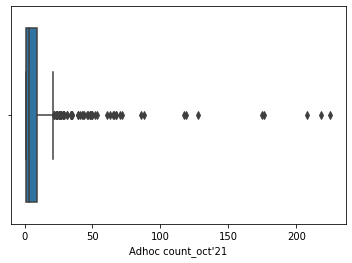

In [35]:
sns.boxplot(final__df["Adhoc count_oct'21"])

In [15]:
### There is first 3 columns in datasets are object type so it is important have them in int

final__df = pd.get_dummies(df , columns = ['Reporting Center', 'Actual vehicle type'] )
final__df ##Reporting center abd Actual Vehicle type Data conerted into numeric format using one hot  encode technique

,State,Adhoc count_oct'21,Additional fixed vehicle,Reporting Center_Agartala_Dhaleswr_D,Reporting Center_Agartala_EastChmpmura_I,Reporting Center_Agartala_Neramaya_D,Reporting Center_Aizawl_Bawngkawn_D,Reporting Center_Aizawl_Dinthar_D,Reporting Center_Aizawl_Tanhril_D,Reporting Center_Aizawl_Tanhril_I,...,Actual vehicle type_Auto (Or Champion),Actual vehicle type_Large Truck 17Ft,Actual vehicle type_Large Truck 19Ft/20Ft,Actual vehicle type_Large Truck 24Ft,Actual vehicle type_Large Truck 32Ft (Sxl),Actual vehicle type_Mini Truck (Ace),Actual vehicle type_Pickup Truck,Actual vehicle type_Truck (407),Actual vehicle type_Truck 14Ft,Actual vehicle type_Van (Or Eeco)
0,TR,4,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,TR,66,4,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,TR,5,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,TR,6,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,TR,6,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,BH,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
615,TR,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
616,WB,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
617,WB,24,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [10]:
df['State'].value_counts().to_dict()

{'WB': 232,
 'BH': 140,
 'OR': 120,
 'JH': 47,
 'AS': 34,
 'MZ': 19,
 'ML': 10,
 'SK': 8,
 'TR': 7,
 'NL': 1}

In [20]:
# In column name State there is also catagorical data present it converted into numeric value using label encode techniques

final__df['State'] = final__df['State'].replace({'WB': 0,
 'BH': 1,
 'OR': 2,
 'JH': 3,
 'AS': 4,
 'MZ': 5,
 'ML': 6,
 'SK': 7,
 'TR': 8,
 'NL': 9})
final__df.head()

,State,Adhoc count_oct'21,Additional fixed vehicle,Reporting Center_Agartala_Dhaleswr_D,Reporting Center_Agartala_EastChmpmura_I,Reporting Center_Agartala_Neramaya_D,Reporting Center_Aizawl_Bawngkawn_D,Reporting Center_Aizawl_Dinthar_D,Reporting Center_Aizawl_Tanhril_D,Reporting Center_Aizawl_Tanhril_I,...,Actual vehicle type_Auto (Or Champion),Actual vehicle type_Large Truck 17Ft,Actual vehicle type_Large Truck 19Ft/20Ft,Actual vehicle type_Large Truck 24Ft,Actual vehicle type_Large Truck 32Ft (Sxl),Actual vehicle type_Mini Truck (Ace),Actual vehicle type_Pickup Truck,Actual vehicle type_Truck (407),Actual vehicle type_Truck 14Ft,Actual vehicle type_Van (Or Eeco)
0,8.0,4,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,8.0,66,4,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,8.0,5,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,8.0,6,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,8.0,6,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [19]:
# To check null value in dataset or not 

final__df.isna().sum()

State                                       1
Adhoc count_oct'21                          0
Additional fixed vehicle                    0
Reporting Center_Agartala_Dhaleswr_D        0
Reporting Center_Agartala_EastChmpmura_I    0
                                           ..
Actual vehicle type_Mini Truck (Ace)        0
Actual vehicle type_Pickup Truck            0
Actual vehicle type_Truck (407)             0
Actual vehicle type_Truck 14Ft              0
Actual vehicle type_Van (Or Eeco)           0
Length: 339, dtype: int64

In [24]:
# At last tail there was only null value present so i drop it 
final__df.dropna(inplace=True)

In [25]:
# Statistical Opporch for data
final__df.describe()

,State,Adhoc count_oct'21,Additional fixed vehicle,Reporting Center_Agartala_Dhaleswr_D,Reporting Center_Agartala_EastChmpmura_I,Reporting Center_Agartala_Neramaya_D,Reporting Center_Aizawl_Bawngkawn_D,Reporting Center_Aizawl_Dinthar_D,Reporting Center_Aizawl_Tanhril_D,Reporting Center_Aizawl_Tanhril_I,...,Actual vehicle type_Auto (Or Champion),Actual vehicle type_Large Truck 17Ft,Actual vehicle type_Large Truck 19Ft/20Ft,Actual vehicle type_Large Truck 24Ft,Actual vehicle type_Large Truck 32Ft (Sxl),Actual vehicle type_Mini Truck (Ace),Actual vehicle type_Pickup Truck,Actual vehicle type_Truck (407),Actual vehicle type_Truck 14Ft,Actual vehicle type_Van (Or Eeco)
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,...,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,1.509709,9.902913,0.466019,0.001618,0.004854,0.001618,0.001618,0.001618,0.003236,0.004854,...,0.169903,0.024272,0.051780,0.030744,0.051780,0.234628,0.200647,0.059871,0.061489,0.114887
std,1.770660,22.771651,1.578721,0.040226,0.069560,0.040226,0.040226,0.040226,0.056842,0.069560,...,0.375852,0.154017,0.221762,0.172764,0.221762,0.424109,0.400809,0.237439,0.240419,0.319144
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,225.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:

##To check all data have converted into int or not???
final__df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 618 entries, 0 to 617
Columns: 339 entries, State to Actual vehicle type_Van (Or Eeco)
dtypes: float64(1), int64(2), uint8(336)
memory usage: 222.1 KB


In [ ]:
# Step no -5 Model training

In [26]:
x = final__df.drop('Additional fixed vehicle' , axis=1)
y = final__df['Additional fixed vehicle']

In [27]:
model =  DecisionTreeRegressor(random_state=1)
model

DecisionTreeRegressor(random_state=1)

In [28]:
x_train , x_test , y_train , y_test = train_test_split(x,y , random_state=1 , train_size=0.8)
model.fit(x_train ,y_train)

DecisionTreeRegressor(random_state=1)

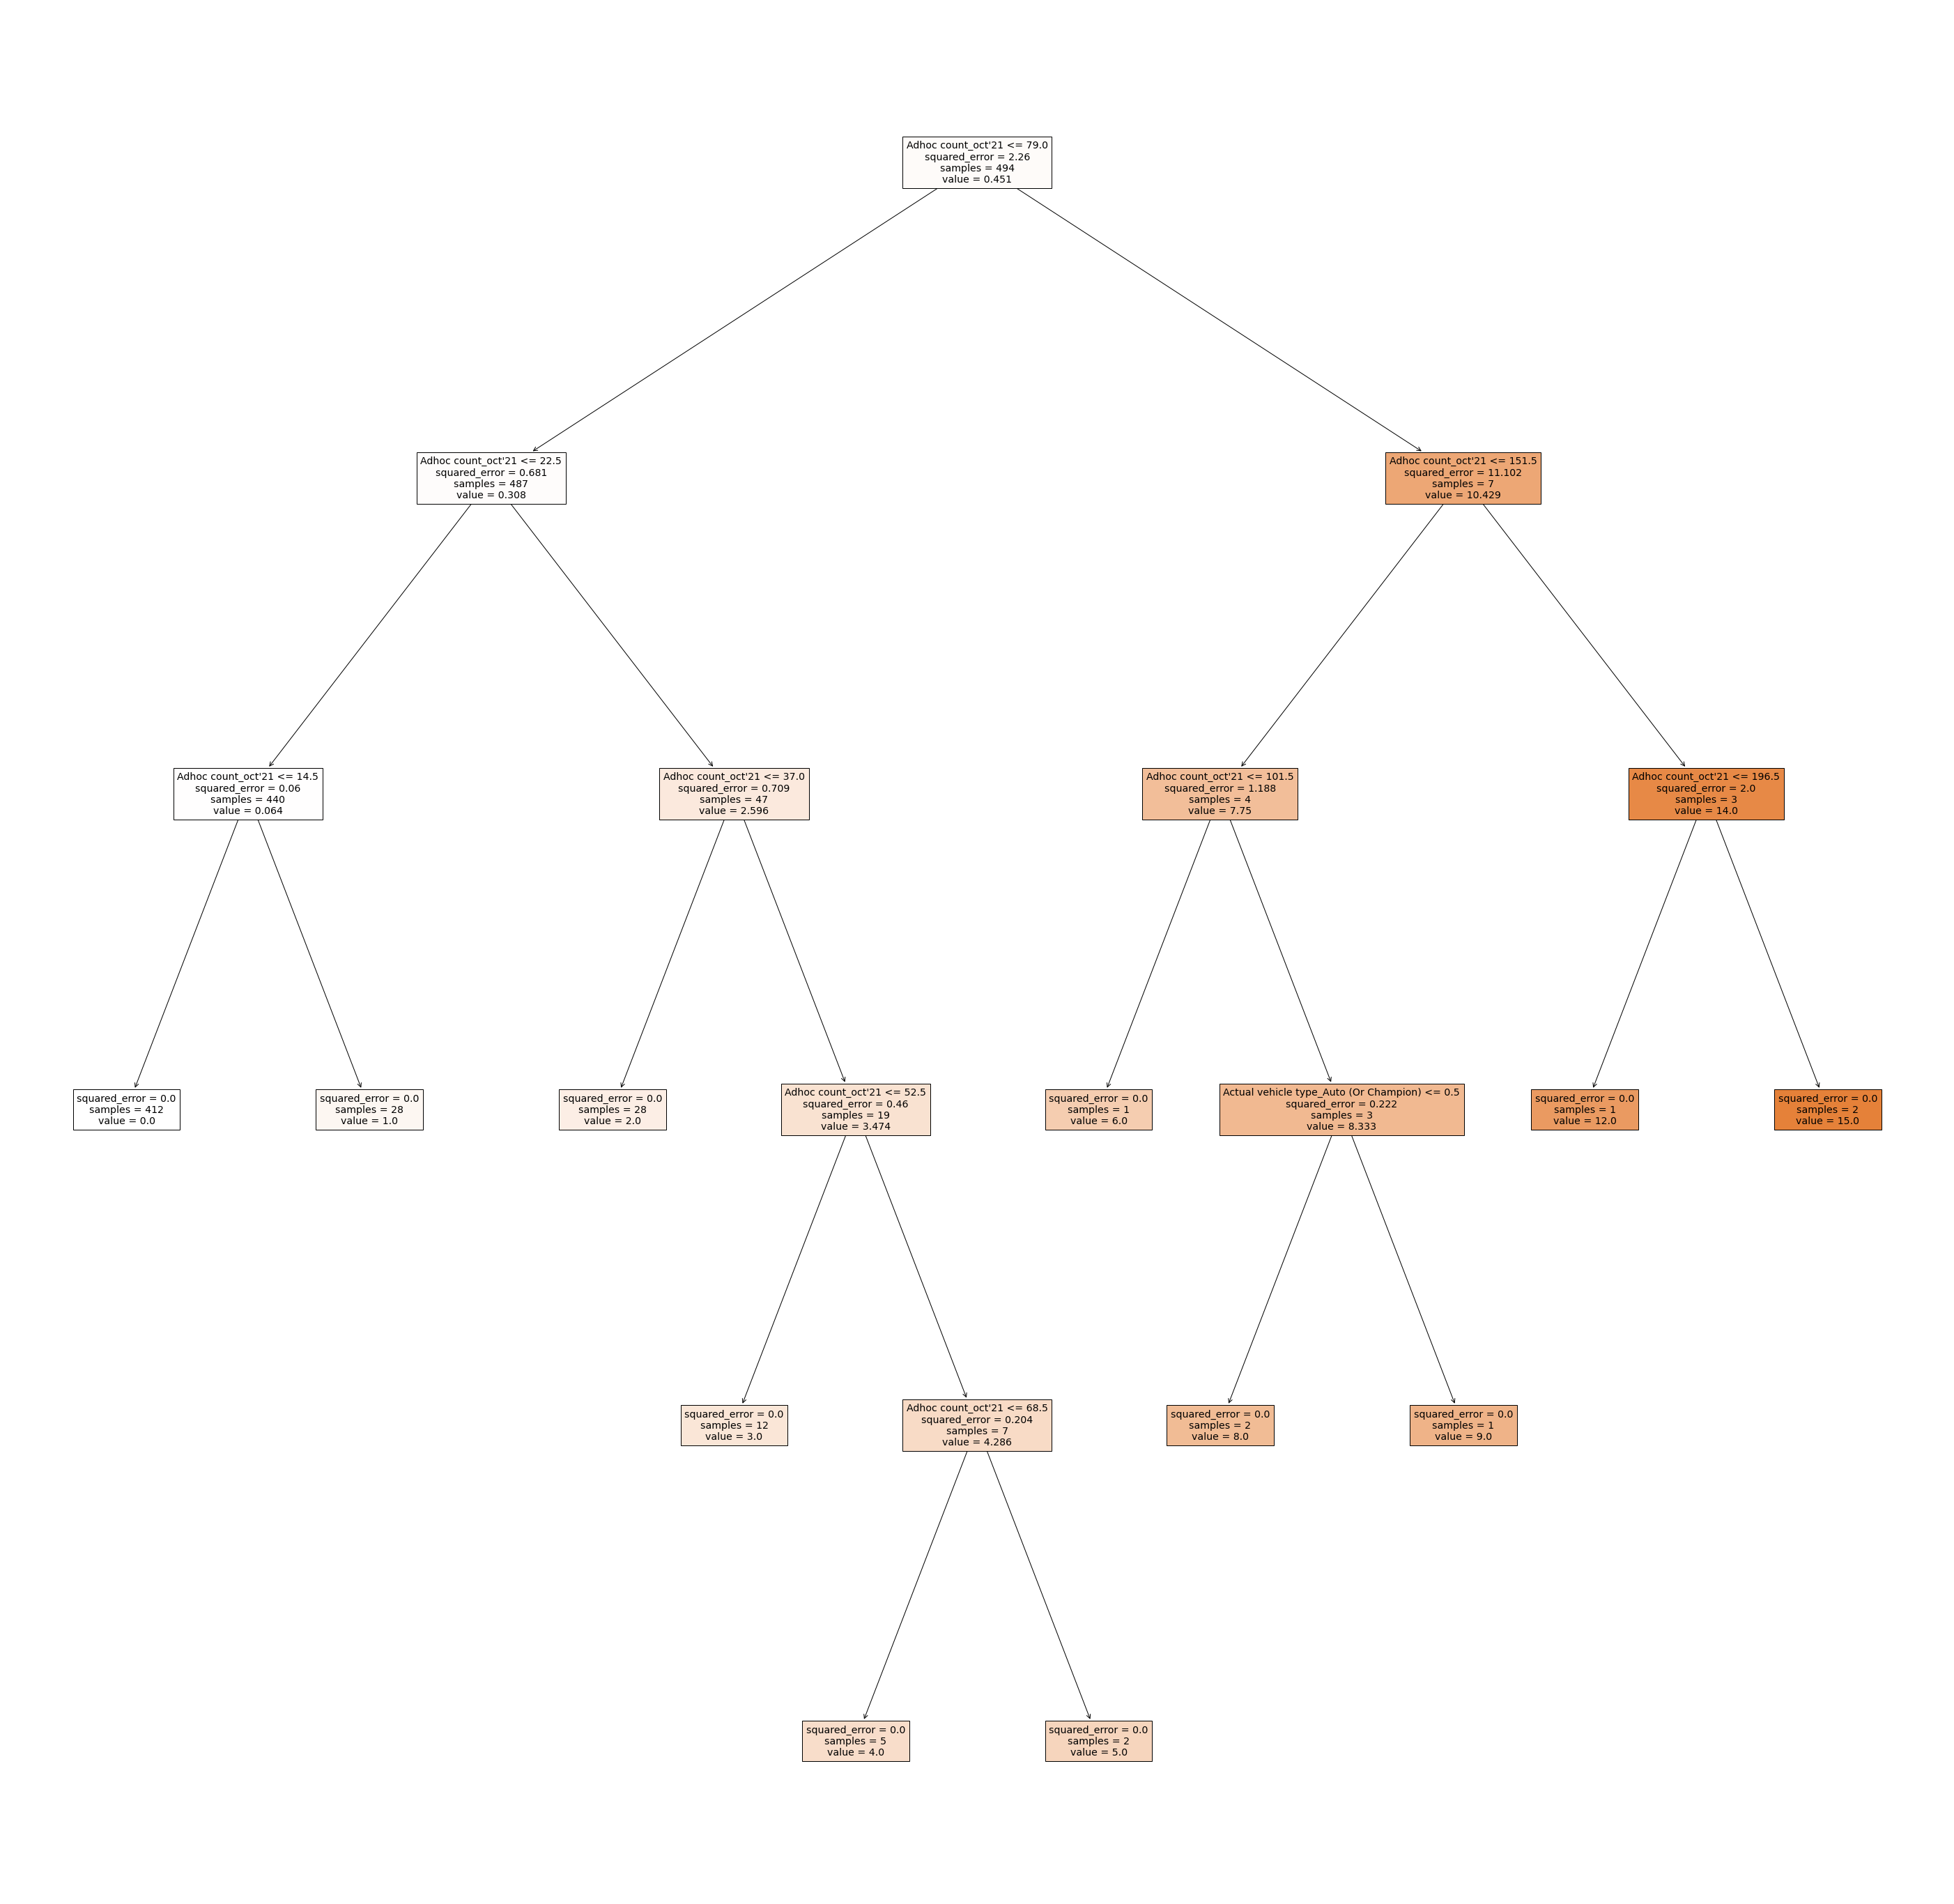

<Figure size 432x288 with 0 Axes>

In [29]:
plt.figure(figsize=(50 , 50))
plot_tree(model ,feature_names=x.columns ,filled=True ,class_names=['Yes','No'])
plt.show()
plt.savefig('tree_adhoc.png')



In [30]:
def accuracy_cal(act , pred):
    model_acc  = accuracy_score(act , pred)
    print(f'Accurcay score for Model == {model_acc}')
    mse = mean_squared_error(act , pred)
    print(f'Mean Squared for Model == {mse}')
    mae = mean_absolute_error(act , pred)
    print(f'Mean Absolute for Model == {mae}')


# Step 6 : Model Evaluation

In [31]:
print('Accuracy on trainning Data') 
y_pred = model.predict(x_train)
accuracy_cal(y_train , y_pred)
print ('*'*100)
print('Accuracy on Testing Data')
y_pred = model.predict(x_test)
accuracy_cal(y_test , y_pred)

Accuracy on trainning Data
Accurcay score for Model == 1.0
Mean Squared for Model == 0.0
Mean Absolute for Model == 0.0
****************************************************************************************************
Accuracy on Testing Data
Accurcay score for Model == 0.9919354838709677
Mean Squared for Model == 0.008064516129032258
Mean Absolute for Model == 0.008064516129032258


In [ ]:
#Bias Variance Trade off

# From above it is clear that this is Generalised Model low bias and low Varience

In [36]:
# feature in models
import json
with open ('feature_name.json' , 'w') as file:
    json.dump({'Input_feature':['Reporting Center','State','Actual vehicle type',"Adhoc count_oct'21"]} , file)

In [37]:
# Convert Pickle file of model
import pickle
with open('model.pkl' , 'wb') as file:
    pickle.dump(model,file)